<a href="https://colab.research.google.com/github/Asiwaju887/Data-Analytics/blob/main/Dublin%20Weather%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import datetime
import seaborn as seb
from matplotlib import pyplot as plt
import math
import datetime as dtime

# from google.colab import files

# uploaded = files.upload()

# for filename in uploaded.keys():
#     print(uploaded[filename])
# cwd = pd.read_csv(io.BytesIO(uploaded['Ireland_DAV_Data.csv']))

In [2]:
#  On my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Mounted at /content/drive


In [3]:
cwd = pd.read_csv('/content/drive/MyDrive/Ireland_DAV_Data.csv', low_memory=False)

In [4]:
#cwd = pd.read_csv(r'C:\Users\asiwaju samuel\Desktop\______Assignment___________\Ireland_DAV_Data.csv', low_memory=False)

# cwd = pd.read_csv(io.BytesIO(uploaded['Ireland_DAV_Data.csv']))
del cwd['ind']
del cwd['ww']
del cwd['w']
del cwd['ind.1']
del cwd['ind.2']
del cwd['ind.3']
del cwd['ind.4']
#cwd.drop(['ind.1', 'ind.2'], axis = 1)
cwd.head()
cwd.tail()
cwd


,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,01/01/1991 00:00,0.0,2.1,1.4,0.2,6.2,87,1010.1,11,230,0.0,40000,999,0
1,01/01/1991 01:00,0.0,2.0,1.0,-0.8,5.8,82,1009.9,11,230,0.0,40000,999,2
2,01/01/1991 02:00,0.0,1.9,0.9,-0.9,5.7,82,1010.1,8,220,0.0,40000,200,6
3,01/01/1991 03:00,0.0,2.6,1.3,-1.1,5.7,77,1009.5,9,220,0.0,40000,999,4
4,01/01/1991 04:00,0.0,4.0,2.2,-0.9,5.7,70,1008.8,9,200,0.0,40000,120,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264404,28/02/2021 20:00,0.0,4.8,4.0,2.8,,,1035.9,6,80,0.0,20000,9,6
264405,28/02/2021 21:00,0.0,3.3,3.3,3.3,,,1035.8,5,100,0.0,5000,999,3
264406,28/02/2021 22:00,0.0,2.4,2.2,1.8,,,1035.5,5,100,0.0,7000,999,1
264407,28/02/2021 23:00,0.0,1.2,1.0,0.7,,,1035.4,4,110,0.0,12000,999,1


In [5]:
print(cwd.shape)
print()
print(cwd.info())

(264409, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264409 entries, 0 to 264408
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    264409 non-null  object 
 1   rain    264409 non-null  float64
 2   temp    264409 non-null  float64
 3   wetb    264409 non-null  float64
 4   dewpt   264409 non-null  float64
 5   vappr   264409 non-null  object 
 6   rhum    264409 non-null  object 
 7   msl     264409 non-null  float64
 8   wdsp    264409 non-null  int64  
 9   wddir   264409 non-null  object 
 10  sun     264409 non-null  float64
 11  vis     264409 non-null  int64  
 12  clht    264409 non-null  int64  
 13  clamt   264409 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 28.2+ MB
None


Some variables are of type **object** which are non **numerical type**, so we convert them to numerical type Float

In [6]:
cwd['rhum'] = pd.to_numeric(cwd['rhum'],errors = 'coerce')
cwd['vappr'] = pd.to_numeric(cwd['vappr'],errors = 'coerce')

In [7]:
print(cwd.columns)

Index(['date', 'rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'wdsp',
       'wddir', 'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


In [8]:
cwd[cwd.isnull().any(axis=1)]

,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
67804,26/09/1998 04:00,0.2,13.7,13.7,13.7,NaN,NaN,1003.8,10,50,0.0,1300,3,8
264296,24/02/2021 08:00,0.0,9.6,7.5,5.0,NaN,NaN,1010.5,12,200,0.0,35000,60,7
264297,24/02/2021 09:00,0.0,9.6,7.4,4.8,NaN,NaN,1011.0,14,180,0.0,35000,100,8
264298,24/02/2021 10:00,0.0,9.5,7.6,5.2,NaN,NaN,1011.5,12,210,0.0,35000,100,8
264299,24/02/2021 11:00,0.0,9.9,7.9,5.6,NaN,NaN,1011.6,10,210,0.0,35000,100,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264404,28/02/2021 20:00,0.0,4.8,4.0,2.8,NaN,NaN,1035.9,6,80,0.0,20000,9,6
264405,28/02/2021 21:00,0.0,3.3,3.3,3.3,NaN,NaN,1035.8,5,100,0.0,5000,999,3
264406,28/02/2021 22:00,0.0,2.4,2.2,1.8,NaN,NaN,1035.5,5,100,0.0,7000,999,1
264407,28/02/2021 23:00,0.0,1.2,1.0,0.7,NaN,NaN,1035.4,4,110,0.0,12000,999,1


In [9]:
cwd.describe()
print(cwd.isnull().sum())
#print(my_data["Date"].unique())

date      0
rain      0
temp      0
wetb      0
dewpt     0
vappr    86
rhum     86
msl       0
wdsp      0
wddir     0
sun       0
vis       0
clht      0
clamt     0
dtype: int64


We have missing values in both  **vappr** and **rhum** and we can impute missing value either by using ***mean, median or knn-imputation***.

In [10]:
# percent of missing "vappr" and "rhum"
print('Percent of missing "Vappr" records is %.2f%%' %((cwd['vappr'].isnull().sum()/cwd.shape[0])*100))
print('Percent of missing "rhum" records is %.2f%%' %((cwd['rhum'].isnull().sum()/cwd.shape[0])*100))


Percent of missing "Vappr" records is 0.03%
Percent of missing "rhum" records is 0.03%


Let start by sampling using impute by mean

In [11]:
missing_col = ['vappr', 'rhum']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
  cwd.loc[cwd.loc[:,i].isnull(),i]=cwd.loc[:,i].mean()
  #cwd.loc[cwd.loc[:,i].isnull(),i]=cwd.loc[:,i].median() #Or using median with this

print(cwd.isnull().sum())

date     0
rain     0
temp     0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
wdsp     0
wddir    0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


We will be using KNN imputer for all missing values.

In [12]:
from sklearn.impute import KNNImputer

missing_col = [ 'vappr', 'rhum']
df_imputed = cwd[missing_col]

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df_imputed)
df_imputed = pd.DataFrame(imputed, columns=df_imputed.columns)
cwd['vappr'] = df_imputed
cwd['rhum'] = df_imputed

#print(cwd.isnull().sum())

In [13]:
print(cwd.isnull().sum())

date     0
rain     0
temp     0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
wdsp     0
wddir    0
sun      0
vis      0
clht     0
clamt    0
dtype: int64


In [14]:
now = dtime.datetime.now()
yearEnd = cwd.date.max() #Not correct
yearStart = cwd.date.min()
print("The range for this dataset is from " + str(yearStart) + " to " + str(yearEnd) +".")
print()
print("Hello, you are accessing this data by this time ", now.strftime("%d-%B-%Y"))

The range for this dataset is from 01/01/1991 00:00 to 31/12/2020 23:00.

Hello, you are accessing this data by this time  27-May-2021


The data consists of the following columns:

- **Id**: A unique row identifier
- **date**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- **rain**: Precipitation Amount in mm
- **temp**: Air Temperature in Celsius
- **wetb**: Wet Bulb Air Temperature Celsius
- **dewpt**: Dew Point Air Temperature Celsius
- **vappr**: Vapour Pressure in hpa
- **rhum**: Relative Humidity in %
- **msl**: Mean Sea Level Pressure in hPa
- **wdsp**: Mean Hourly Wind Speed in kt
- **wddir**: Predominant Hourly wind Direction in kt
- **ww**: Synop Code Present Weather - decode below
- **w**: Synop Code Past Weather - decode below
- **sun**: Sunshine duration in hours
- **vis**: Visibility in m
- **clht**: Cloud Ceiling Height - if none value is 999 in 100s feet
- **clamt**: Cloud Amount in okta



In this dataset, **temp** represents the label (the *y* value) our model must be trained to predict. The other columns are potential features (*x* values).

As mentioned previously, you can perform some *feature engineering* to combine or derive new features. For example, let's add a new column named **day** to the dataframe by extracting the day component from the existing **date** column. The new column represents the day of the month from 1 to 31.

## **Descriptive Statistics**

In [15]:
print("Some descriptions for Numeric features in the dataset")

print("This is the median of the following values ")
print(cwd[["temp", "wetb", "dewpt", "vappr", "rhum"]].median())

cwd.describe()
cwd[["temp", "wetb", "dewpt", "vappr", "rhum"]].describe()

Some descriptions for Numeric features in the dataset
This is the median of the following values 
temp      9.8
wetb      8.5
dewpt     7.0
vappr    10.0
rhum     10.0
dtype: float64


,temp,wetb,dewpt,vappr,rhum
count,264409.000000,264409.000000,264409.000000,264409.000000,264409.000000
mean,9.730602,8.343735,6.805659,10.296357,10.296357
std,4.947062,4.401764,4.465323,3.093661,3.093661
min,-11.500000,-49.900000,-11.700000,2.500000,2.500000
25%,6.200000,5.200000,3.500000,7.900000,7.900000
50%,9.800000,8.500000,7.000000,10.000000,10.000000
75%,13.300000,11.700000,10.100000,12.400000,12.400000
max,26.900000,21.400000,20.000000,23.300000,23.300000


The mean temperature of Ireland is  9.730602210968641


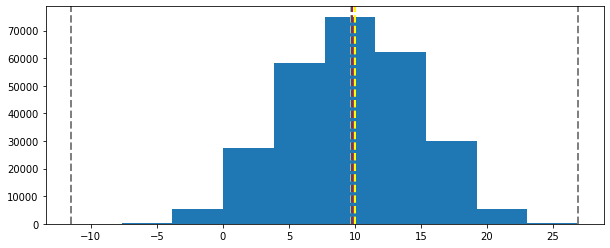

In [16]:
fig = plt.figure(figsize=(10,4))
temp_data = cwd['temp']

plt.hist(temp_data)

# Add lines for the statistics
plt.axvline(x=cwd['temp'].min(), color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=cwd['temp'].mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=cwd['temp'].median(), color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=cwd['temp'].mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=cwd['temp'].max(), color = 'gray', linestyle='dashed', linewidth = 2)

fig.show()

print("The mean temperature of Ireland is  " + str(cwd['temp'].mean()))

In [17]:
mean_temp = cwd['temp'].mean()
print(mean_temp)

9.730602210968641


Different sorting can be done to the dataset in order to study it, we can make a sorting base on the time (either afternoon or night).
We can also sort base on the months

In [18]:
cwd['year'] = pd.DatetimeIndex(cwd['date']).year
cwd['month'] = pd.DatetimeIndex(cwd['date']).month
cwd
#cwd.tail()


,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt,year,month
0,01/01/1991 00:00,0.0,2.1,1.4,0.2,6.200000,6.200000,1010.1,11,230,0.0,40000,999,0,1991,1
1,01/01/1991 01:00,0.0,2.0,1.0,-0.8,5.800000,5.800000,1009.9,11,230,0.0,40000,999,2,1991,1
2,01/01/1991 02:00,0.0,1.9,0.9,-0.9,5.700000,5.700000,1010.1,8,220,0.0,40000,200,6,1991,1
3,01/01/1991 03:00,0.0,2.6,1.3,-1.1,5.700000,5.700000,1009.5,9,220,0.0,40000,999,4,1991,1
4,01/01/1991 04:00,0.0,4.0,2.2,-0.9,5.700000,5.700000,1008.8,9,200,0.0,40000,120,7,1991,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264404,28/02/2021 20:00,0.0,4.8,4.0,2.8,10.296357,10.296357,1035.9,6,80,0.0,20000,9,6,2021,2
264405,28/02/2021 21:00,0.0,3.3,3.3,3.3,10.296357,10.296357,1035.8,5,100,0.0,5000,999,3,2021,2
264406,28/02/2021 22:00,0.0,2.4,2.2,1.8,10.296357,10.296357,1035.5,5,100,0.0,7000,999,1,2021,2
264407,28/02/2021 23:00,0.0,1.2,1.0,0.7,10.296357,10.296357,1035.4,4,110,0.0,12000,999,1,2021,2


Let do some descriptions by grouping. Let find the means for numeric columns grouped by years

In [19]:
print("Find the means for numeric columns grouped by years")
print(cwd.groupby('year')["temp"].mean())
print(cwd.groupby('month')["temp"].mean())

Find the means for numeric columns grouped by years
year
1991     9.891724
1992    10.024226
1993     9.782043
1994     9.520194
1995     9.977660
1996     9.003962
1997    10.049737
1998     9.886221
1999     9.862329
2000     9.406022
2001     9.371393
2002     9.985342
2003     9.944121
2004     9.903700
2005    10.099110
2006    10.234532
2007    10.211986
2008     9.488331
2009     9.577272
2010     8.450753
2011    10.026153
2012     9.405897
2013     9.516199
2014    10.085936
2015     9.500057
2016     9.828279
2017    10.074852
2018     9.953356
2019     9.845194
2020     9.787238
2021     4.951729
Name: temp, dtype: float64
month
1      7.035851
2      7.365170
3      7.994447
4      8.960925
5     10.726976
6     12.281292
7     13.267203
8     12.677280
9     11.398790
10     9.763989
11     8.087098
12     7.153876
Name: temp, dtype: float64


In [20]:
groupby_months = cwd.groupby('month')
groupby_months.describe()

rain                           ...    year                        
         count      mean       std  min  ...     25%     50%     75%     max
month                                    ...                                
1      22825.0  0.080903  0.360348  0.0  ...  1998.0  2006.0  2014.0  2021.0
2      20784.0  0.089213  0.475891  0.0  ...  1998.0  2006.0  2013.0  2021.0
3      22368.0  0.080249  0.352118  0.0  ...  1998.0  2006.0  2013.0  2021.0
4      21648.0  0.076058  0.328967  0.0  ...  1998.0  2006.0  2013.0  2021.0
5      22368.0  0.088381  0.432573  0.0  ...  1998.0  2006.0  2013.0  2021.0
6      21648.0  0.086165  0.421733  0.0  ...  1998.0  2006.0  2013.0  2021.0
7      22368.0  0.080320  0.421011  0.0  ...  1998.0  2006.0  2013.0  2021.0
8      22368.0  0.091993  0.453275  0.0  ...  1998.0  2006.0  2013.0  2021.0
9      21648.0  0.088045  0.470189  0.0  ...  1998.0  2006.0  2013.0  2021.0
10     22368.0  0.096379  0.468417  0.0  ...  1998.0  2006.0  2013.0  2021.0
11     21648.0  0.112440  0.487203  0.0  ...  1998.0  2006.0  2013.0  2021.0
12     22368.0  0.089610  0.365896  0.0  ...  1998.0  2006.0  2013.0  2021.0

[12 rows x 104 columns]

        year  temp
0       1991   2.1
1       1991   2.0
2       1991   1.9
3       1991   2.6
4       1991   4.0
...      ...   ...
264404  2021   4.8
264405  2021   3.3
264406  2021   2.4
264407  2021   1.2
264408  2021   0.1

[264409 rows x 2 columns]


                    date  clht
0       01/01/1991 00:00   999
1       01/01/1991 01:00   999
2       01/01/1991 02:00   200
3       01/01/1991 03:00   999
4       01/01/1991 04:00   120
...                  ...   ...
264404  28/02/2021 20:00     9
264405  28/02/2021 21:00   999
264406  28/02/2021 22:00   999
264407  28/02/2021 23:00   999
264408  01/03/2021 00:00   999

[264409 rows x 2 columns]




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


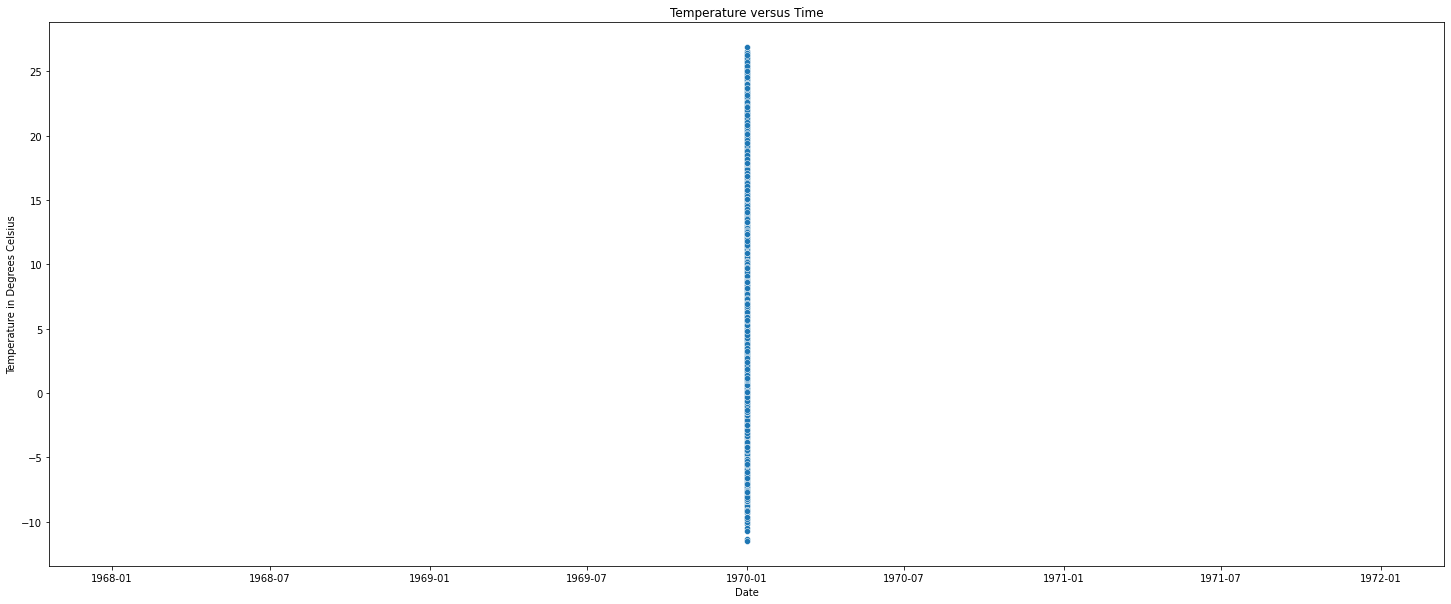

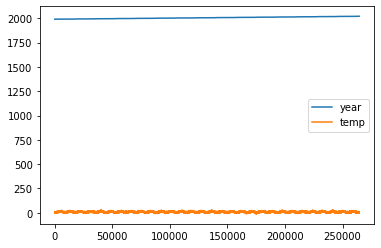

In [21]:
plt.figure(figsize=(25,10))

dataslice = cwd[['year','temp']]
column1 = pd.to_datetime(cwd['year'])
column2 = cwd['temp']
print(dataslice)
print("\n")
 
dataslice2 = cwd.iloc[:, [0,12]]
print(dataslice2)
print("\n")


fig = seb.scatterplot(column1, column2)
fig.set(xlabel='Date', ylabel='Temperature in Degrees Celsius', title = 'Temperature versus Time')

dataslice.plot()
plt.show()



In [32]:
s= cwd.groupby(['year'])['temp'].mean().reset_index().sort_values(by='temp',ascending=False)
s.style.background_gradient(cmap='Reds')

,year,temp
15,2006,10.234532
16,2007,10.211986
14,2005,10.099110
23,2014,10.085936
26,2017,10.074852
6,1997,10.049737
20,2011,10.026153
1,1992,10.024226
11,2002,9.985342
4,1995,9.977660


I modify https://link.springer.com/article/10.1007/s00704-020-03118-2/tables/1 and https://www.gmp-compliance.org/gmp-news/ambient-room-temperature-cold-what-is-what to form this below

In [ ]:

cwd

def f1(row):

    if (row['temp'] > 25):
        value = 'hot'
    elif (row['temp'] > 15) & (row['temp'] <= 25):
        value = 'room_temperature'
    elif (row['temp'] > 4) & (row['temp'] <= 15):
        value = 'warm'
    elif (row['temp'] > -5) & (row['temp'] <= 4):
        value = 'cold'
    elif (row['temp'] <= -5):
        value = 'frozen'    
    else:
        value = 'Abmormal'

    return value

cwd['Weather'] = cwd.apply(f1, axis=1)


#deep_freeze  = pd.Series(cwd['temp'] <= 20)
#refrigerator = pd.Series(cwd['temp'] >= 2 | cwd['temp'] <= 8)
#Cold or cool: 8°C to 15°C;
#Room temperature: 15°C to 25°C.
#cwd = pd.concat([cwd, deep_freeze.rename("Pass")], axis=1)

cwd

In [ ]:
seb.pairplot(cwd)


In [ ]:
plt.figure(figsize=(15,5))
seb.barplot(x='month', y= 'temp',data=s,palette='hsv_r')
plt.title('MEAN TEMPERATURE OF DIFFERENT MONTHS IN THE DATASET')
plt.show()

In [ ]:
ctime = now.strftime("%H:%M:%S")
mNight = "00:00:00"
mtime1 = "00:00:01"
mtime2 = "11:59:59"
ntime = "12:00:00"
aftime1 = "12:00:01"
aftime2 = "18:00:00"
etime1 = "18:00:01"
etime2 = "23:59:59"

if ctime == mNight:
    print("It is midnight now")
else:
    print("It is not midnight now")
    if ctime >= mtime1 and ctime <=mtime2:
        print("It is morning now")
    else:
        print("It is not morning now")
        if ctime == ntime:
            print("It is noon now")
        else:
            print("It is not noon now")
            if ctime >= aftime1 and ctime <=aftime2:
                print("It is afternoon now")
            else:
                print("It is not afternoon now")
                if ctime >= etime1 and ctime <=etime2:
                    print("It is evening now")
                else:
                    print("It is not evening now")


In [ ]:
yearEnd = cwd.date.max()
yearStart = cwd.date.min()
print("The range for this dataset is from " + str(yearStart) + " to " + str(yearEnd) +".")

In [ ]:
numeric_data = ['rain', 'dewpt', 'wetb', 'vappr', 'rhum', 'wdsp', 'clht']
cwd[numeric_data + ['temp']].describe()

This statistics shows some detail about the distribution of the numeric features of the data, this include the number of observations (there are 264409 records), the mean, standard deviation, minimum and maximum values, and the quartile values (the threshold values for 25%, 50% - [50% is also the median], and 75% of the data). We can say that the mean of the of the temperature is around 9.730602. and the standard deviation indicates that is little variance in the temoerature of each hours.


We might get a clearer idea of the distribution of the temperature values by visualizing the data. Common plot types for visualizing numeric data distributions are histograms and box plots, so let's use Python's matplotlib library to create one of each of these for temperature column.

In [ ]:
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

# Get the label column
label = cwd['temp']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_xlabel('Temperature')
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('temp')

# Add a title to the Figure
fig.suptitle('Temperature Distribution')

# Show the figure
fig.show()

The plot above shows that the temperature ranges from -11 degrees to about 26 degrees and the majority of the distribution is between 6 degrees to about 12 degrees. However the mean, and median numbers of the hourly temperature is close r to the middle range of the distribution which is between -5 to 23 degreees.

The few values above this are shown in the box plot as small circles, indicating that they are **outliers** - in other words, unusually high or low values beyond the typical range of most of the data. We can see that the outliners are not easily noticable for the temperature column

In [ ]:
# Plot a histogram for each numeric data
for col in numeric_data:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = cwd[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

The numeric data put into consideration have different behavoiurs, for some like **temp** and **dewp** they are *normally* distributed, but for *prcp* and *wdsp* the plot show that they are not normally distributed.

> **Note**: The distributions are not truly *normal* in the statistical sense, which would result in a smooth, symmetric "bell-curve" histogram with the mean and mode (the most common value) in the center; but they do generally indicate that most of the observations have a value somewhere near the middle.

After studying the numerical data, we will take a look at the categorical data, we won't be able to use histogram because they are not continuous numbers, so we will plot them on bar chart.

In [ ]:
# Plot bar chart for each categorical data
categorical_data = ['sun', 'month', 'Weather']
for col in categorical_data:
    count = cwd[col].value_counts().sort_index()
    fig = plt.figure(figsize=(12, 6))
    ax = fig.gca()
    count.plot.bar(ax = ax, color = 'steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

In [ ]:
seb.set()
plt.figure(figsize=(10,5))
seb.countplot(y="month", data=cwd)
#seb.countplot(y="year", data=cwd)

Here, we verify the number of null elements in each of the column as given in the result above.

In [ ]:
df_jan = cwd[cwd['month'] =='1'].count()
df_jan

In [ ]:
x = cwd.wetb
y = cwd.temp
plt.scatter(x,y)
plt.title('A graph of temp against wetb')
plt.xlabel('temp in celsius')
plt.ylabel('wetb')
plt.show()

In [ ]:
cwd.shape

The **data** contains 264409 elements, each of which is an array containing 17 elements.

To navigate this you need to specify each element position in the hierarchy

## **Inferential Statistics**

In this session we will be doing some simple statistics test and then writing conclusion what each test mean to our analysis.

In [ ]:
from scipy import stats
stats.ttest_1samp(cwd['vappr'], 0)  

## Finding Correlation in our Data

It's time to check for the correlation, or relationship among the features in our dataset. Here, we ascertain if any relationship exist and we check if any strong relationship exist i.e correlation > 0.5 or -0.5

In [ ]:
cwd2 = cwd
#cwd2.drop('date', axis=1, inplace=True)
#cwd2.drop('wddir', axis=1, inplace=True)
del cwd2['date']
del cwd2['wddir']
del cwd2['Weather']


In [ ]:
#Scaling of the 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cwd =scaler.fit_transform(cwd2)
scaled_cwd = pd.DataFrame(scaled_cwd)
scaled_cwd.head()
# cwd2.fillna(0)
# cwd2.info()




In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
pearson_corr = cwd.corr(method='pearson')
print(pearson_corr)

seb.set_style("white")
cmap = seb.diverging_palette(200, 10, as_cmap=True)
seb.heatmap(pearson_corr, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
spearman_corr = cwd.corr(method='spearman')
spearman_corr

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
seb.set_style("white")
cmap = seb.diverging_palette(200, 10, as_cmap=True)
seb.heatmap(spearman_corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
seb.set_style({'xtick.bottom': True}, {'ytick.left': True})

This help to show the correlations between each features and to check which will be use to predict the fututre temperature.

We can see that temp, wetb, dewpt & vappr have strong correlation between one another.

In [ ]:
spearman_corr[(spearman_corr >= 0.5) | (spearman_corr <= - 0.5)]

In [ ]:
#number of data in months
for month in np.arange(1,13):
    print("Number of Data in "+str(month)+" Month = "+str(len(cwd[(cwd["month"]==month)])))

In [ ]:
mean_temp = cwd['temp'].mean()
print('Average tempearture: {:.2f}'.format(mean_temp,))

In [ ]:
for col in numeric_data:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = cwd[col]
    label = cwd['temp']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Temperature')
    ax.set_title('temp vs ' + col + '- correlation: ' + str(correlation))
plt.show()

## Training the Regression Model

After exploring the data, we move to the level three, training the regression model and using the features identified from the correlation analysis to potentially predict the **temp** label. We need to differentiate the features we want to use to train the model from the label we want to use to predict it.

In [ ]:
# Separate features and labels
X, y = cwd[['rain','wetb', 'dewpt','vappr','rhum','wdsp','sun', 'vis', 'clht', 'clamt', 'month']].values, cwd['temp'].values
print('Features:',X[:11], '\nLabels:', y[:11], sep='\n')

After separation of dataset, we have two numpy arrays namely X which contains the features, and y which contains the labels.

We can train a model using all the data but it is not statistically right, it is a common practice in supervised learning to split the data into two subsets; a larger set which will be use to train the model, and a smaller one which will be use to validate the trained model. This enables to know how well the model performs when it is use with the validation dataset by comparing the predicted labels to the known labels. It is important to split the data randomly and not selecting the data that will be for the training and testing. This help ensure that the two subsets are comparable.

To randomly split the data, we'll use the train_test_split function in the scikit-learn library. This library is one of the most widely used machine learning packages for Python.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

### **Linear Regression**

Now we have the following four datasets:

*   **X_train**: The feature values that will be use to train the model.
*   **y_train**: The resulting labels that will be use to train the model
*   **X_test**: The feature values that will be use to validate the model
*   **y_test**: The resulting labels that will be use to validate the model

We will train the model by using regression algorithm to the training data. Let start with linear regression algorithm, a common starting point for regression that works is by trying to find a linear relationship between the X values and the y label. The resulting model is a function that conceptually defines a line where every possible X and y value combination intersect.

In Scikit-Learn, training algorithms are encapsulated in estimators, and in this case we'll use the LinearRegression estimator to train a linear regression model.

In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Fit a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)
print (model)

In [ ]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:11])
print('Actual labels   : ' ,y_test[:11])

In [ ]:
from matplotlib import pyplot as plt
# The mean squared error
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

Comparing each prediction with its corresponding "ground truth" actual value isn't a very efficient way to determine how well the model is predicting. Let's see if we can get a better indication by visualizing a scatter plot that compares the predictions to the actual labels. We'll also overlay a trend line to get a general sense for how well the predicted labels align with the true labels.

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly temperature Predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### **Another Linear Regression**

Let work with another regression model, are using Lasso algorithm to train our data. We will change the estimator in the training code and compare the result.

In [ ]:
from sklearn.linear_model import Lasso

# Fit in the lasso model that is used for the training set
model = Lasso(random_state = 42).fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly Temperature Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### **Using a Decision Tree**
Decision tree is an alternative to linear model, here the features in the dataset are seens as a series of evaluations, each result is a branch of the decision tree. At the end of each series of branches is a leaf node with the predicted label value

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

In [ ]:
# Evaluate the model using the test data, to determine if the decision tree have any effect on the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly Temperature Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### **Ensemble Algorithm**

This work by combining multiple learning base estimators to produce a better predictive and optimal performance. We will be trying out bootstraps algorithms or bagging which takes multiple samples from the training dataset and using it to model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly Temperature Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Stochastic Gradient Boosting** (also called Gradient Boosting Machine) is one of the most sophisticated ensemble techniques. It is one of the best techniques for improving the performance of the the predictive model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the model
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly Temperature Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
from sklearn.ensemble import VotingRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)

# Train the model
model = VotingRegressor([('lr', r1), ('rf', r2)]).fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly Temperature Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### **Optimization of Hyperparameter**

Hyperparameter tuning is choosing a optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is use to control the learning process.
The hyperparameters for an estimator varies based on the algorithm used on the estimator for prediction. The hyperparameter helps to get better predictions or to reduces training time

We will try applying it on the **GradientBoostingRegressor** estimator.

We will be using SciKit-Learn already implementation algorithm in order to tune hyperparameters by trying lot of combinations and finding the best result for out training.

We will implement a grid search method to try combinations of possible values for the learning_rate and n_estimators hyperparameters of the GradientBoostingRegressor estimator.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly Temperature Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### **Pipeline**

In [ ]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9,10]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

In [ ]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly Temperature Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [ ]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Hourly Temperature Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()